In [1]:
import numpy as np
import matplotlib.pyplot as plt
## This script shows how the curved zones are calculated in the Laser_checker.py file
# It uses a given radius

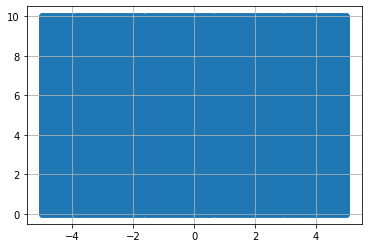

In [2]:
# Generate a matrix of points for testing
x = np.linspace(-5, 5, 101)
y = np.linspace(0, 10, 101)

xx, yy = np.meshgrid(x, y)
xx_flat = xx.flatten()
yy_flat = yy.flatten()

plt.scatter(xx_flat,yy_flat)
plt.grid()

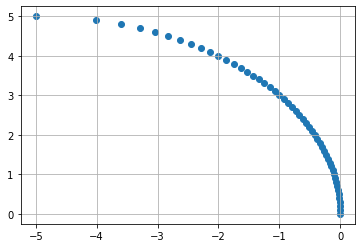

In [3]:
y_curve = np.linspace(0,5,51)
x_curve = np.sqrt(25-np.square(y_curve))-5

plt.scatter(x_curve,y_curve)
plt.grid()

In [4]:
# Calcualte the allowed x cordinate for a given y cordinate at the point of the lidar scanner on the TAS car using the equation of a circle
# x²+y²=r²
xx_curve = -(np.sqrt(np.square(25)-np.square(yy_flat))-25)

# Shift result for every upper boundary of the front three zones and only use points that are under the threshold
xx_zone_0 = xx_flat[xx_curve+1.5>=xx_flat]
yy_zone_0 = yy_flat[xx_curve+1.5>=xx_flat]
xx_curve_0 = xx_curve[xx_curve+1.5>=xx_flat] #elimination of to big parts of xx_flat

xx_zone_1 = xx_flat[xx_curve+0.5>=xx_flat]
yy_zone_1 = yy_flat[xx_curve+0.5>=xx_flat]
xx_curve_1 = xx_curve[xx_curve+0.5>=xx_flat]

xx_zone_2 = xx_flat[xx_curve-0.5>=xx_flat]
yy_zone_2 = yy_flat[xx_curve-0.5>=xx_flat]
xx_curve_2 = xx_curve[xx_curve-0.5>=xx_flat]

In [5]:
# Now elimination of everything under the lower threshold
xx_zone_0_f = xx_zone_0[(xx_curve_0+0.5) <=xx_zone_0]
yy_zone_0_f = yy_zone_0[(xx_curve_0+0.5) <=xx_zone_0]

xx_zone_1_f = xx_zone_1[(xx_curve_1-0.5) <=xx_zone_1]
yy_zone_1_f = yy_zone_1[(xx_curve_1-0.5) <=xx_zone_1]

xx_zone_2_f = xx_zone_2[(xx_curve_2-1.5) <=xx_zone_2]
yy_zone_2_f = yy_zone_2[(xx_curve_2-1.5) <=xx_zone_2]

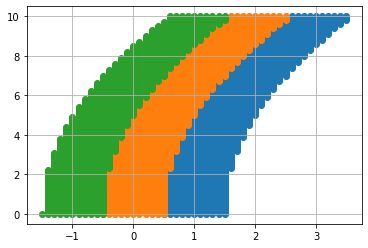

In [6]:
# Plot on how the actual zones are surpossed to look like
plt.scatter(xx_zone_0_f,yy_zone_0_f)
plt.scatter(xx_zone_1_f,yy_zone_1_f)
plt.scatter(xx_zone_2_f,yy_zone_2_f)
plt.grid()